<a href="https://colab.research.google.com/github/eyang16/ECGR_4105_ML_Fall_2025/blob/main/ECGR_4105_ML_HW4_Eyang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Homework 4
# Ethan Yang
# ID: 801250277
# ECGR_4105_Machine_Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


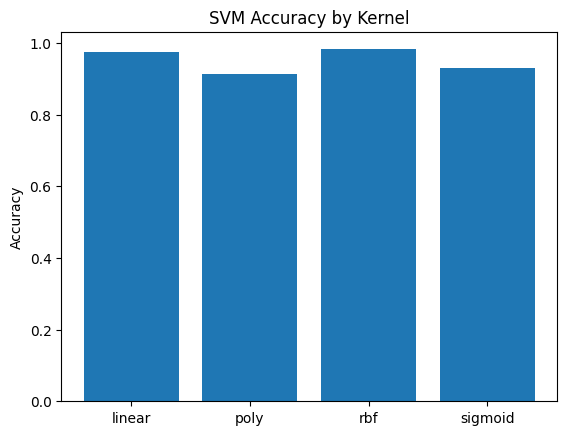

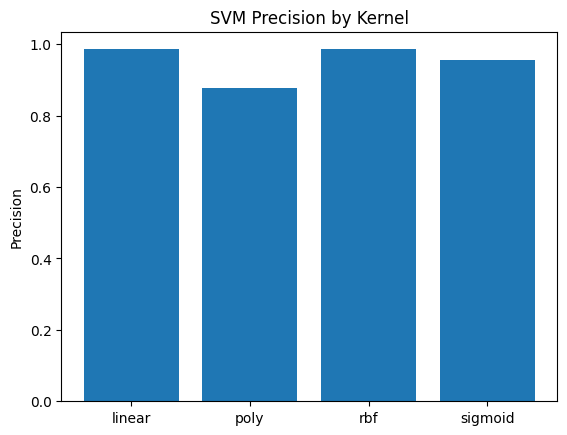

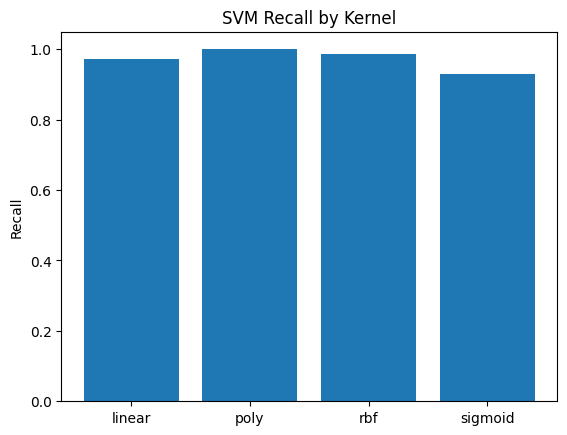

Accuracy: 0.9736842105263158
Precision: 0.9859154929577465
Recall: 0.9722222222222222


In [10]:
# Problem 1

cancer = datasets.load_breast_cancer()
cancer_X = cancer.data
cancer_y = cancer.target

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    cancer_X, cancer_y, test_size=0.2, random_state=42, stratify=cancer_y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with linear kernel
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for k in kernels:
    clf = SVC(kernel=k, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[k] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred)
    }

# Plot results
metrics = ['accuracy', 'precision', 'recall']
for m in metrics:
    plt.figure()
    plt.bar(results.keys(), [results[k][m] for k in kernels])
    plt.title(f"SVM {m.capitalize()} by Kernel")
    plt.ylabel(m.capitalize())
    plt.show()

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

In [11]:
# Problem 2

# Use the URL for the raw CSV data -- more datasets can be find here: https://github.com/satishgunjal/datasets
# Replace current url with the one that links the D3.csv file from my own github rep. if that doesnt work find a way to connect it directly to a downloaded .csv file
housing_url = 'https://raw.githubusercontent.com/eyang16/ECGR_4105_ML_Fall_2025/refs/heads/main/Homework_4/Housing.csv'

housing_df = pd.read_csv(housing_url)

# Display the first 5 rows of the DataFrame
print(housing_df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


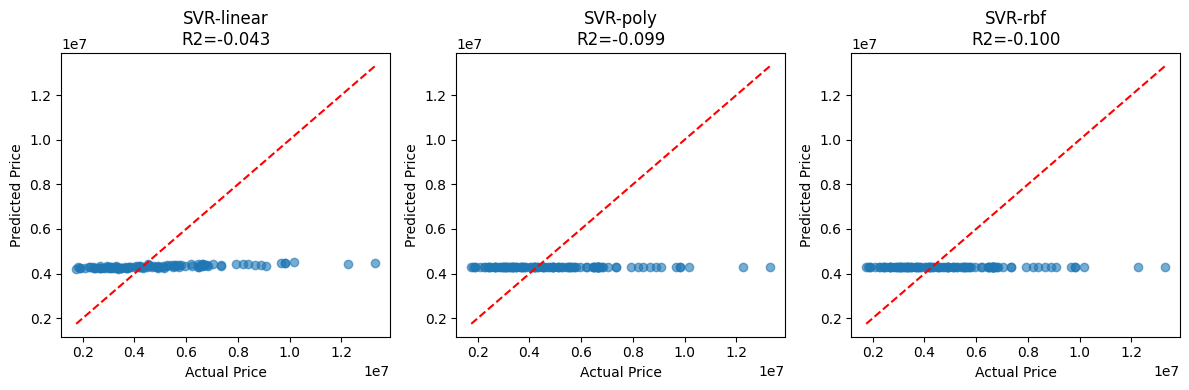

                 MSE        R2
linear  5.272522e+12 -0.043120
poly    5.554916e+12 -0.098989
rbf     5.561683e+12 -0.100328


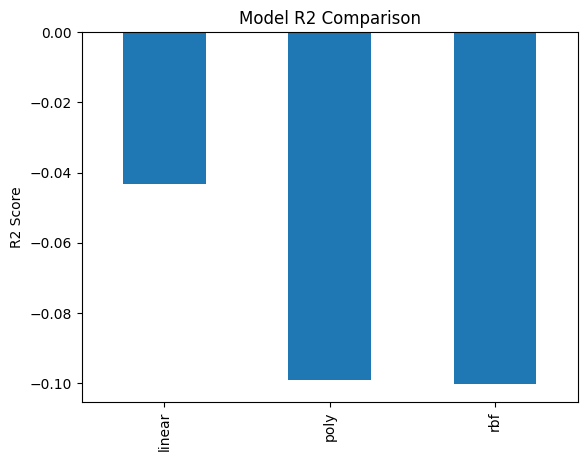

In [12]:
categorical_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
housing_df[categorical_cols] = housing_df[categorical_cols].apply(lambda col: col.map({'yes':1, 'no':0}))

X = housing_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom',
                'basement','hotwaterheating','airconditioning','parking','prefarea']]
y = housing_df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kernels = ['linear','poly','rbf']
results = {}

for k in kernels:
    svr = SVR(kernel=k, C=100, gamma='scale')
    svr.fit(X_train_scaled, y_train)
    y_pred = svr.predict(X_test_scaled)
    results[k] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Plot predictions vs actual for each kernel
plt.figure(figsize=(12,4))
for i, k in enumerate(kernels):
    svr = SVR(kernel=k, C=100, gamma='scale')
    svr.fit(X_train_scaled, y_train)
    y_pred = svr.predict(X_test_scaled)
    plt.subplot(1,3,i+1)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"SVR-{k}\nR2={results[k]['R2']:.3f}")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
plt.tight_layout()
plt.show()

df_results = pd.DataFrame(results).T
print(df_results)

df_results['R2'].plot(kind='bar', title="Model R2 Comparison", ylabel="R2 Score")
plt.show()
